In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
import os
import pandas as pd

#Problem 1 Answers
####1. each row represents one: review
####2. there are 208166 rows in the dataset; there are 9 columns in the dataset excluding the index
####3. first review was written on: 12/29/2013; the last review was written on: 5/5/2019

In [5]:
fpath = 'drive/MyDrive/Customer Data Analysis/'
os.listdir(fpath)

['MyNotes Mod1.ipynb',
 'A1 Treasure Love_Part1.ipynb',
 'A1_Part2.ipynb',
 'MyNotes_Mod2.ipynb',
 'A2 Programming Fundamentals.ipynb',
 '9-8_notes.ipynb',
 'stores A data-set.csv',
 'stores data-set.csv',
 'stores B data-set.csv',
 'stores C data-set.csv',
 'sales data-set.csv',
 '9-8_notes2.ipynb',
 'Colab Notebooks',
 'Copy of InClass_Module_3.ipynb',
 'Notes_Sept15.ipynb',
 'A3.ipynb',
 'quebec_yelp_reviews.csv',
 'quebec_biz.csv']

In [6]:
Quebec = pd.read_csv(fpath + 'quebec_yelp_reviews.csv', index_col = 0)

In [7]:
Quebec.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,stars
0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,5
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4
2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,1
3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,3
4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,0,1,1,The bagels are good but first they had me writ...,2015-05-26,2


In [9]:
Quebec.shape

(208166, 9)

In [11]:
Quebec.columns.values

array(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date', 'stars'], dtype=object)

In [14]:
Quebec['dt'] = pd.to_datetime(Quebec['date'])

In [15]:
Quebec.dt.min()

Timestamp('2007-01-02 00:00:00')

In [16]:
Quebec.dt.max()

Timestamp('2019-12-13 00:00:00')

#Problem 2

In [17]:
Quebec2 = Quebec.loc[(Quebec['dt']>='2016-5-1')&(Quebec['dt']<'2019-6-1')].copy()

In [18]:
Quebec2.dt.min()

Timestamp('2016-05-01 00:00:00')

In [19]:
Quebec2.dt.max()

Timestamp('2019-05-31 00:00:00')

In [20]:
Quebec2.to_csv(fpath+ 'Quebec_dataset.csv')

1. When people explained why they felt a certain why, they, on average, recieved a higher helpfulness rating
2. People like a more indepth answer for why they did and didn't like something

#Promblem 3

1. Seasonal patterns I saw was that data was higher in the Winter months, and lower in the Summer months
2. This pattern exists because consumers may be more bored and willing to spend time writing reviews.

In [21]:
Quebec2['ym'] = Quebec2.dt.dt.to_period('M')

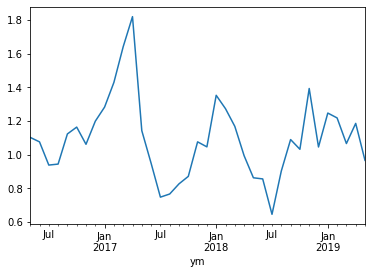

In [22]:
Quebec2.groupby('ym')['useful'].mean().plot()

In [23]:
Quebec2.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,stars,dt,ym
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4,2016-07-14,2016-07
7,Sc0YoR19v2ZHqPjjReMdfQ,8VFNDokKKbpUgCrH6TF9fA,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Cheap and delicous! I definently understand wh...,2016-09-19,4,2016-09-19,2016-09
10,uZnzhtYAXAO_4ICeWOq9_A,bemY1DWj0rOLIPUBRnfkjg,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Coming from a NYCer... This place is an absolu...,2018-09-03,5,2018-09-03,2018-09
11,Vx19GFjr7lSltZGOvBY6-A,0_7UeN4U_D6Iw6tHm90tXg,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,Great bagel if purchased straight from the ove...,2017-05-26,4,2017-05-26,2017-05
13,bXJ2bQ815xuUTLgo2UXpww,YVaONBBT9lSJQwBPWCB0qQ,tOhRQqiupLyJdBJVQMGOEQ,3,2,1,Location: Let me think.... oh yes - on Fairmou...,2017-06-17,4,2017-06-17,2017-06


In [24]:
Quebec2['ym'].unique()

<PeriodArray>
['2016-07', '2016-09', '2018-09', '2017-05', '2017-06', '2017-07', '2016-05',
 '2018-08', '2017-08', '2017-10', '2016-10', '2018-07', '2016-08', '2016-06',
 '2017-04', '2017-01', '2018-06', '2018-02', '2018-05', '2017-09', '2018-04',
 '2018-03', '2016-12', '2016-11', '2017-02', '2017-11', '2017-03', '2018-01',
 '2018-10', '2017-12', '2019-01', '2018-12', '2018-11', '2019-04', '2019-03',
 '2019-02', '2019-05']
Length: 37, dtype: period[M]

#Problem 4

1. Observational unit: businesses
2. Merge the column 'is_open' into the review dataset

In [70]:
from matplotlib import pyplot as plt

In [71]:
x = pd.concat([Quebec2, Quebec3])

In [40]:
x.reset_index(drop=True, inplace = True)

In [43]:
Quebec3 = pd.read_csv(fpath + 'quebec_biz.csv')

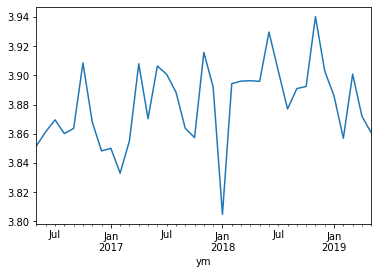

In [61]:
x.groupby('ym')['stars'].mean().plot()

TypeError: ignored

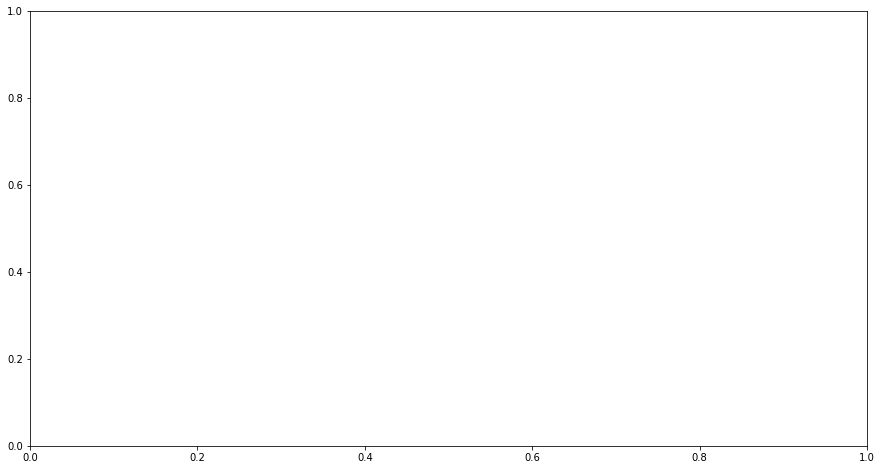

In [94]:
fig, ax = plt.subplots(1, figsize = (15,8))
ax.plot(x, color = 'blue')
ax2.plot(is_open, color = 'red')
ax.set_ylabel('Star Rating')
ax.set_xlabel('Year/Month')

##Part A
1. each row: business
1. merge on reviews